# Introduction

On va s'intéresser à la gestion des données manquantes dans un DataFrame

# Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des données contenues dans datas.csv

In [76]:
df = pd.read_csv('datas.csv', index_col=0)

# Aperçu des 5 premières lignes

In [4]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_0,8,1,705.0,NaN,US,PBI,DCA,857,0,0,0,0,0
Vol_1,10,3,705.0,920.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,700.0,922.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,700.0,910.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,724.0,921.0,US,PBI,DCA,857,0,0,0,0,0


# Premières infos statistiques

In [5]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000
mean,15.903449,3.746162,1338.023937,1486.588686,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243
std,8.943123,1.987111,473.366590,496.272674,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,930.000000,1109.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,1327.000000,1516.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,5.000000,1730.000000,1909.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,7.000000,2431.000000,2550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000


# Compte des valeurs présentes pour chaque colonne

In [6]:
df.count()

DayofMonth           297324
DayOfWeek            297324
DepTime              297324
ArrTime              297026
UniqueCarrier        297324
Origin               297324
Dest                 297324
Distance             297324
CarrierDelay         297324
WeatherDelay         297324
NASDelay             297324
SecurityDelay        297324
LateAircraftDelay    297324
dtype: int64

# Transformer DepTime et ArrTime en temps en minute

In [77]:
df.DepTime = [60 * (x // 100) + x % 100 for x in df.DepTime]

In [78]:
df.ArrTime = [60 * (x // 100) + x % 100 for x in df.ArrTime]

In [9]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0


# Gestion des manquants

Environ 1 ArrTime sur 1000 est manquant. On va explorer différentes façons de gérer ces valeurs manquantes

### On peut simplement supprimer les lignes concernées

In [20]:
df_drop = df.dropna(inplace=False)

In [21]:
df_drop.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0
Vol_5,18,4,418.0,549.0,US,PBI,DCA,857,0,0,0,0,0


In [13]:
df['missingArrTime'] = [np.isnan(x) for x in df.ArrTime]

In [14]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,missingArrTime
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,True
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,False
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,False
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,False
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,False


In [22]:
df_drop = df[-(np.isnan(df.ArrTime))]

In [23]:
df_drop.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0
Vol_5,18,4,418.0,549.0,US,PBI,DCA,857,0,0,0,0,0


### On peut remplacer les manquants par une valeur constante, par exemple basée sur le temps de vol moyen ou median

In [30]:
df.ArrTime.fillna(df.ArrTime.mean()).head()

Vol_0    903.694663
Vol_1    560.000000
Vol_2    562.000000
Vol_3    550.000000
Vol_4    561.000000
Name: ArrTime, dtype: float64

### On peut remplacer les manquants par une valeur constante, par exemple basée sur le temps de vol moyen ou median

In [31]:
df['FlightTime'] = [y - x for x, y in zip(df.DepTime, df.ArrTime)]

In [32]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0


In [33]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297026.000000
mean,15.903449,3.746162,814.659257,903.694663,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243,89.024321
std,8.943123,1.987111,283.953208,297.834452,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187,212.653588
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1429.000000
25%,8.000000,2.000000,570.000000,669.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,16.000000,4.000000,807.000000,916.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
75%,24.000000,5.000000,1050.000000,1149.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,786.000000


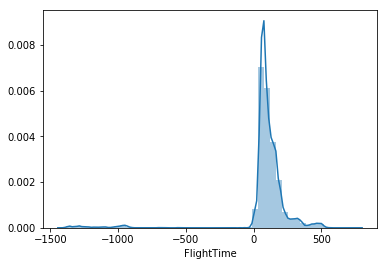

In [34]:
sns.distplot(df.dropna().FlightTime)

In [35]:
df['FlightTime'] = [y - x if y - x >= 0 else y - x + 1440 for x, y in zip(df.DepTime, df.ArrTime)]

In [36]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297026.000000
mean,15.903449,3.746162,814.659257,903.694663,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243,132.060554
std,8.943123,1.987111,283.953208,297.834452,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187,130.160160
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,570.000000,669.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
50%,16.000000,4.000000,807.000000,916.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000
75%,24.000000,5.000000,1050.000000,1149.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,1439.000000


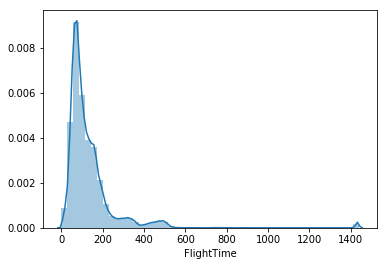

In [37]:
sns.distplot(df.dropna().FlightTime)

In [40]:
df_1 = df[(df.FlightTime < df.FlightTime.mean() + 3*df.FlightTime.std()) & (df.FlightTime > df.FlightTime.mean() - 3*df.FlightTime.std())]

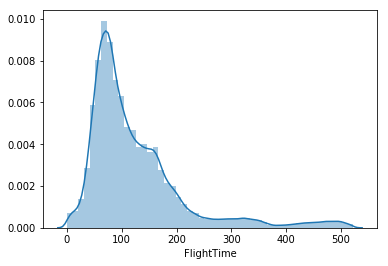

In [41]:
sns.distplot(df_1.FlightTime)

In [42]:
IQR = df.FlightTime.quantile(0.75) - df.FlightTime.quantile(0.25)
df_2 = df[(df.FlightTime < df.FlightTime.quantile(0.75) + 1.5*IQR) & (df.FlightTime > df.FlightTime.quantile(0.25) - 1.5*IQR)]

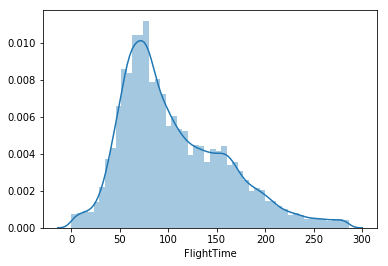

In [43]:
sns.distplot(df_2.FlightTime)

In [44]:
meanFlightTime = df_1.FlightTime.mean()
meanFlightTime

124.4710644301402

In [45]:
medianFlightTime = df_1.FlightTime.median()
medianFlightTime

97.0

In [48]:
df['ArrTime_meanFlightTime'] = [x + meanFlightTime if np.isnan(y) else y for x, y in zip(df.DepTime, df.ArrTime)]

In [49]:
df['ArrTime_medianFlightTime'] = [x + medianFlightTime if np.isnan(y) else y for x, y in zip(df.DepTime, df.ArrTime)]

In [50]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,549.471064,522.0
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000,560.0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000,562.0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000,550.0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000,561.0


### On peut remplacer les manquants d'après le temps de vol moyen pour chaque couple (Origin Dest)

In [51]:
flightTimePerRoute = df[['Origin', 'Dest', 'FlightTime']].groupby(['Origin', 'Dest']).mean()

In [53]:
flightTimePerRoute.head()

FlightTime
Origin Dest            
ABE    ATL   120.355556
       CLE    75.583333
       CLT    93.400000
       CVG    96.297297
       JFK    52.500000

In [56]:
flightTimePerRoute.loc['ABE'].loc['ATL'].values[0]

120.35555555555555

In [58]:
df['ArrTime_FlightTimePerRoute'] = [x + flightTimePerRoute.loc[z].loc[t].values[0] if np.isnan(y) else y for x, y, z, t in zip(df.DepTime, df.ArrTime, df.Origin, df.Dest)]

In [59]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,549.471064,522.0,559.227273
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000,560.0,560.000000
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000,562.0,562.000000
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000,550.0,550.000000
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000,561.0,561.000000


In [60]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000
mean,15.903449,3.746162,814.659257,903.694663,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243,132.060554,903.719106,903.691572,903.722629
std,8.943123,1.987111,283.953208,297.834452,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187,130.160160,297.834759,297.833776,297.851373
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,8.000000,2.000000,570.000000,669.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,669.000000,669.000000,669.000000
50%,16.000000,4.000000,807.000000,916.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1149.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000,1149.000000,1149.000000,1149.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,1439.000000,1550.000000,1550.000000,2221.090909


### On peut remplacer les manquants d'après une régression du temps de vol en fonction de la distance (en utilisant linregress de scipy)

In [66]:
df= df[df.FlightTime < 1200]

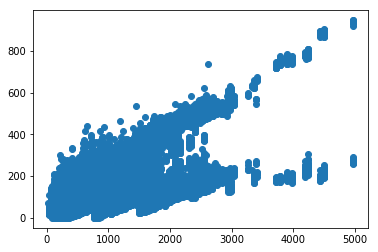

In [67]:
plt.scatter(df.Distance, df.FlightTime)

In [68]:
from scipy.stats import linregress

In [69]:
slope, intercept, r_value, p_value, std_err = linregress(df.dropna().Distance, df.FlightTime.dropna())

In [70]:
slope

0.1188107088598277

In [71]:
intercept

38.36240361058873

In [72]:
r_value

0.7379948919962781

In [73]:
p_value

0.0

In [79]:
df['ArrTime_regress'] = [x + slope * y + intercept if np.isnan(z) else z for x, y, z in zip(df.DepTime, df.Distance, df.ArrTime)]

In [80]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrTime_regress
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,565.183181
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,560.000000
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,562.000000
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,550.000000
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,561.000000


# Sauvegarder le nouveau DataFrame en supprimant les estimations de ArrTime les moins pertinentes